# ANOVA (Analysis of Variance)

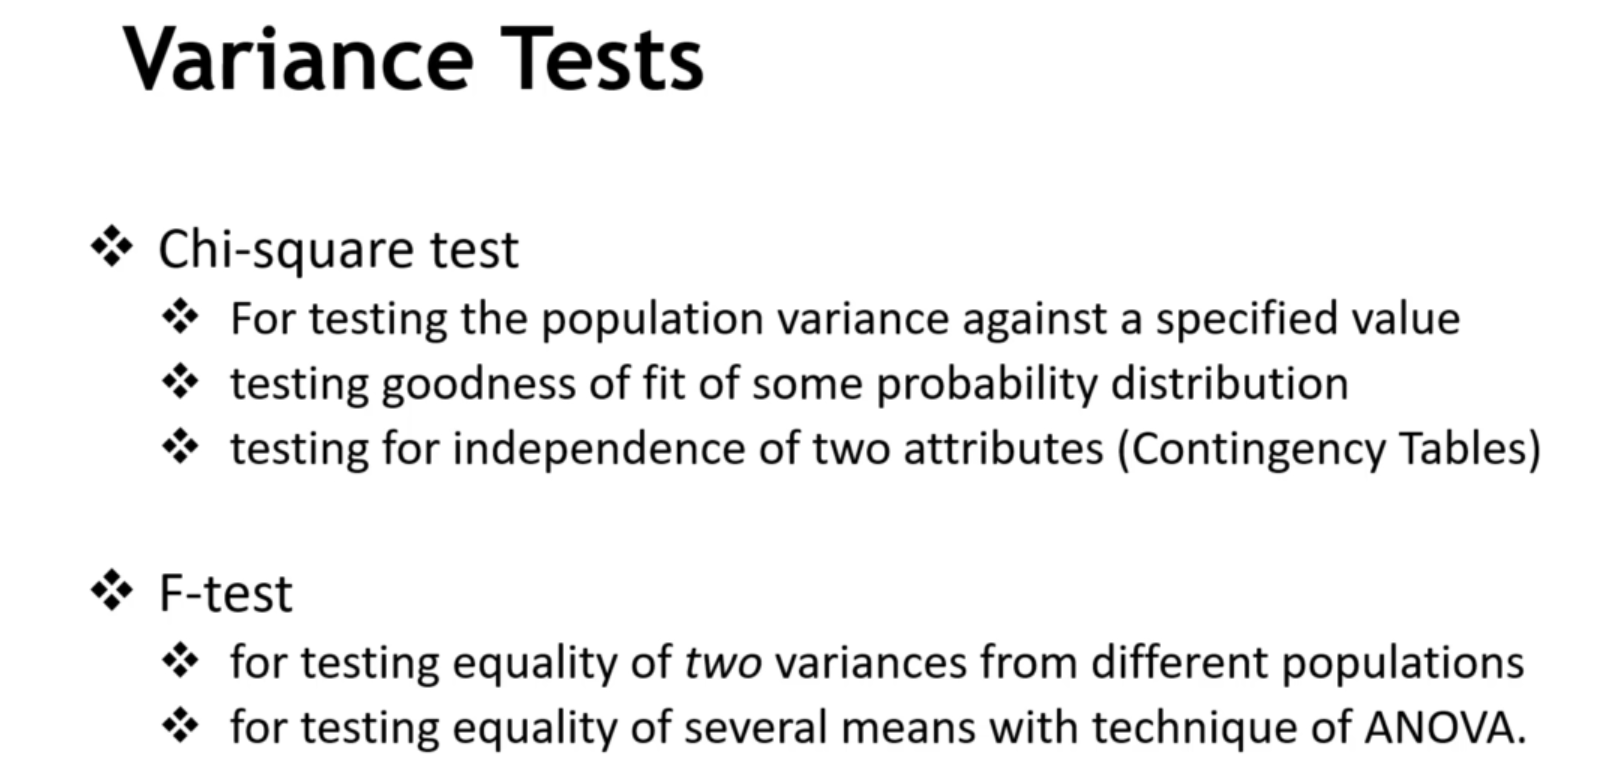

## ANOVA vs T Test

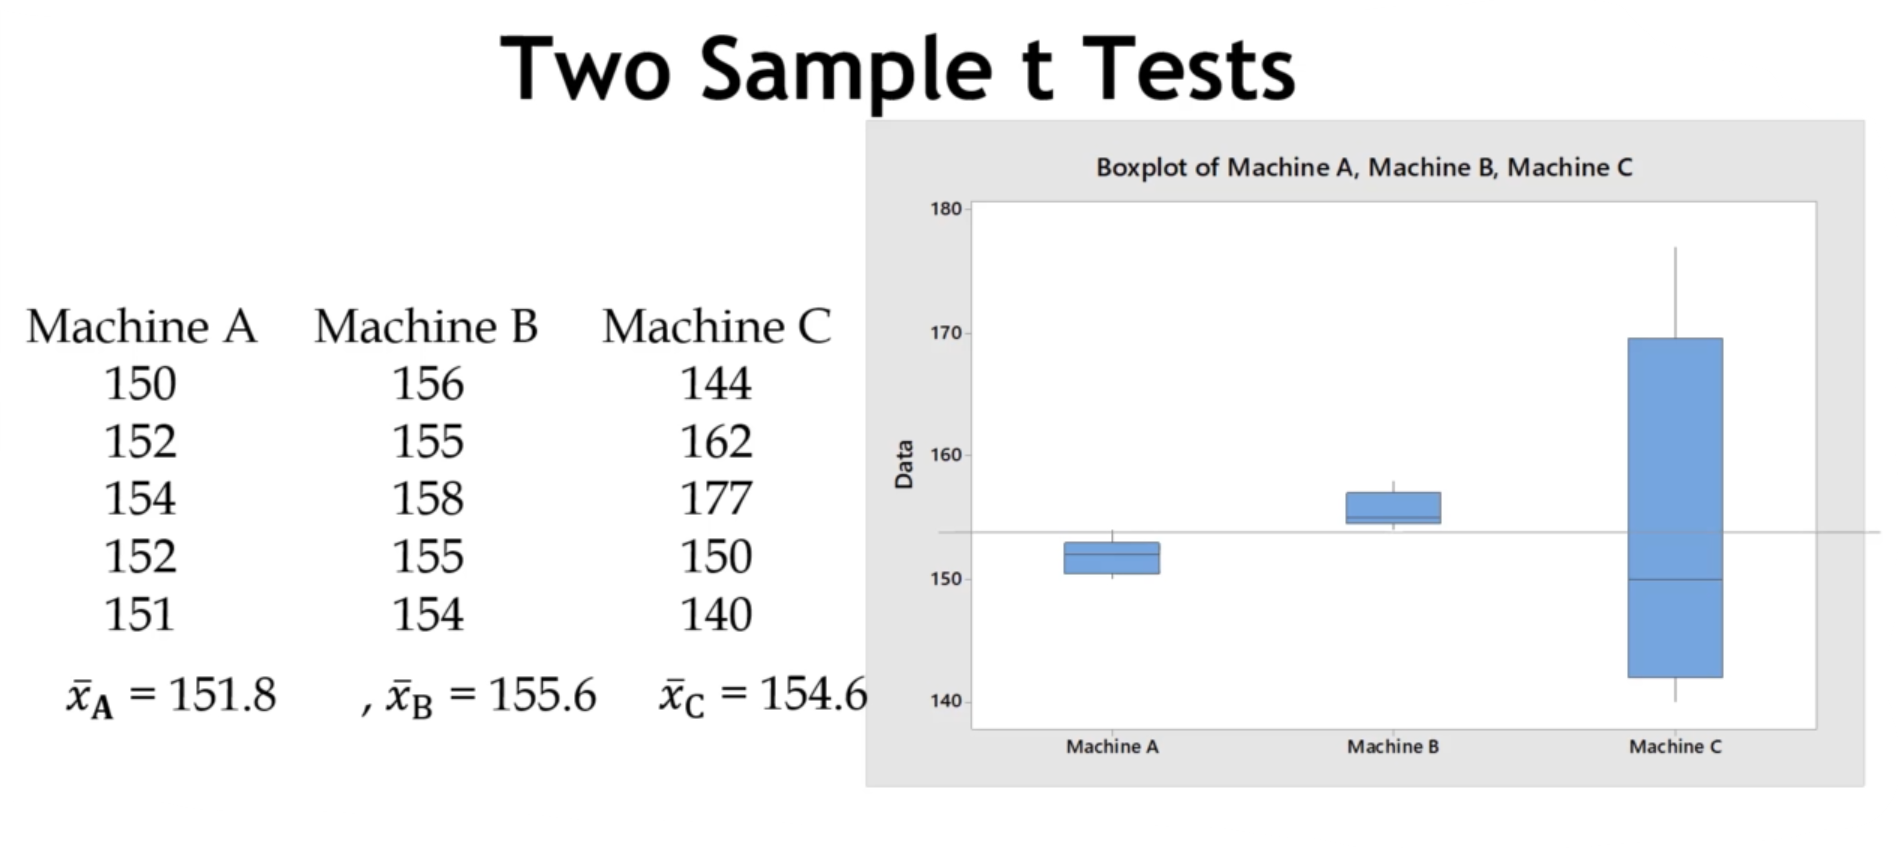

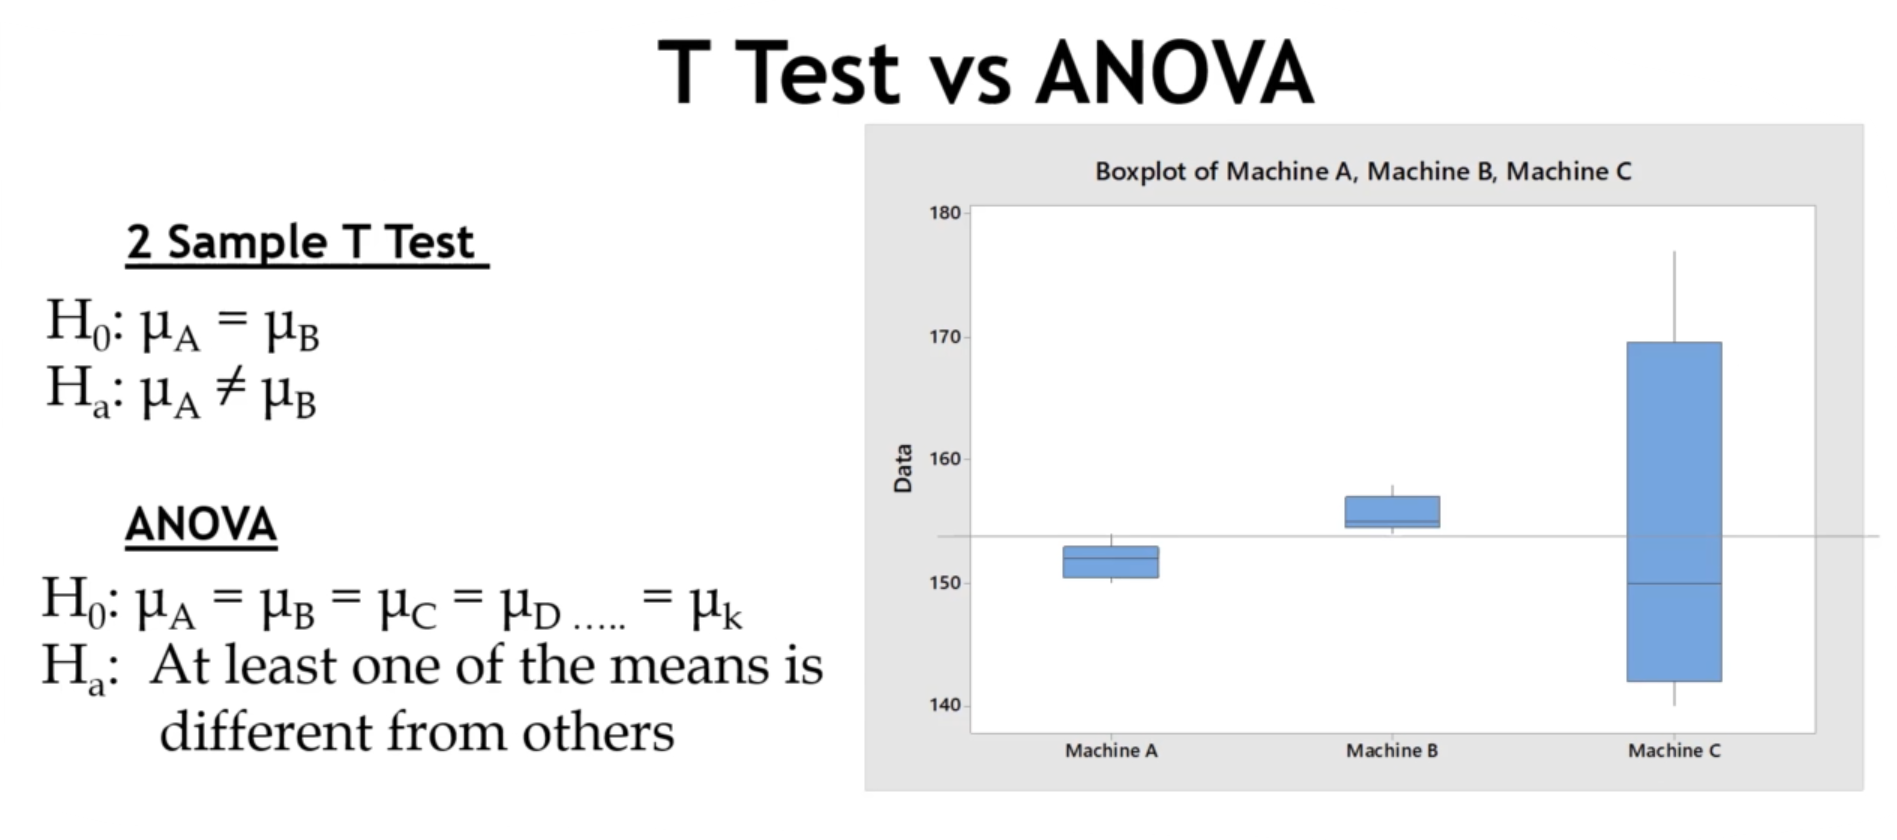

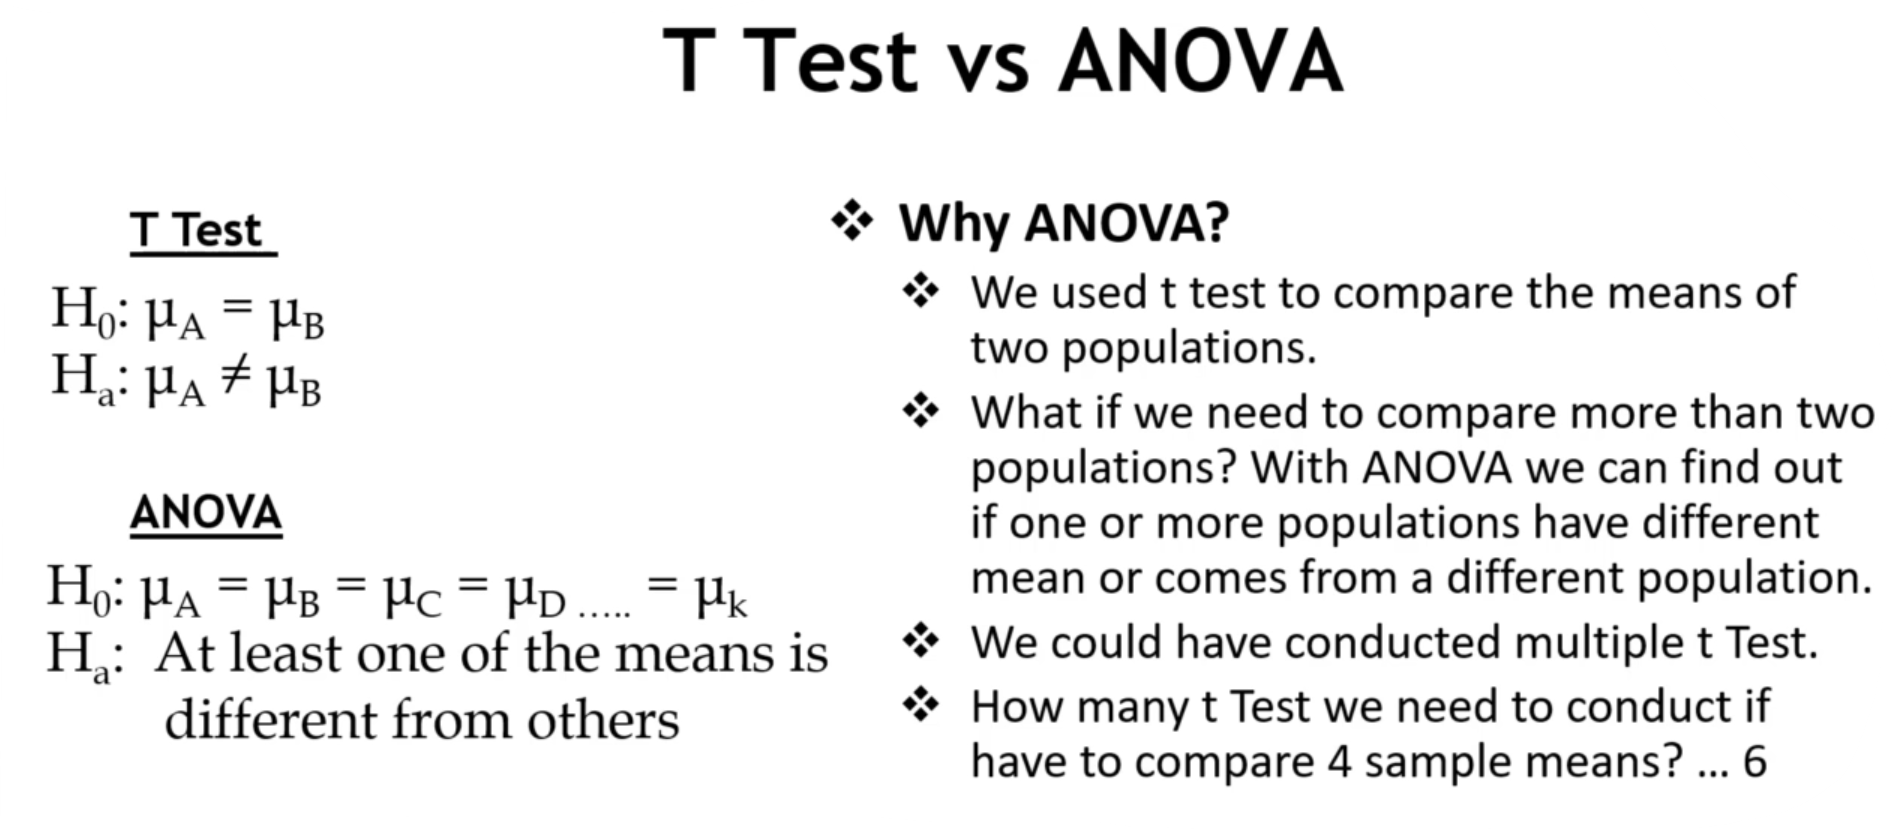

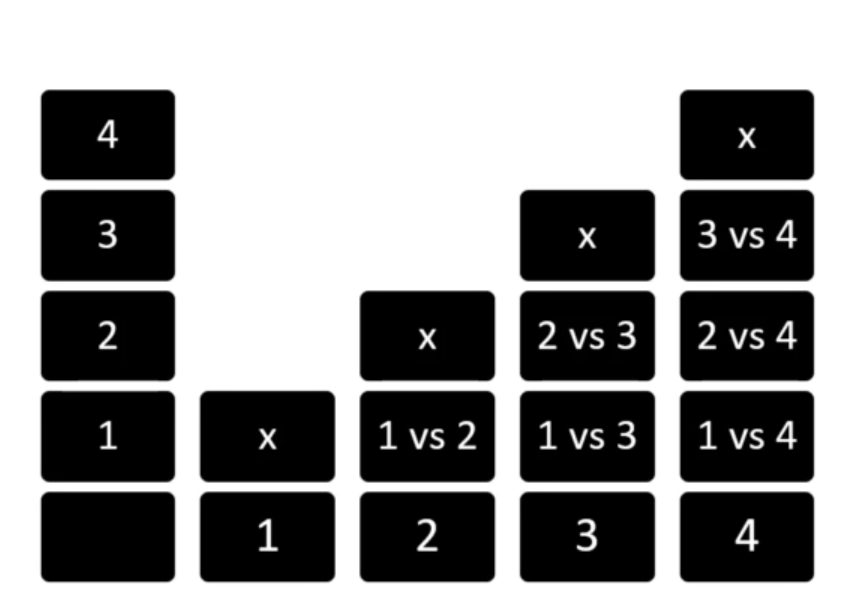

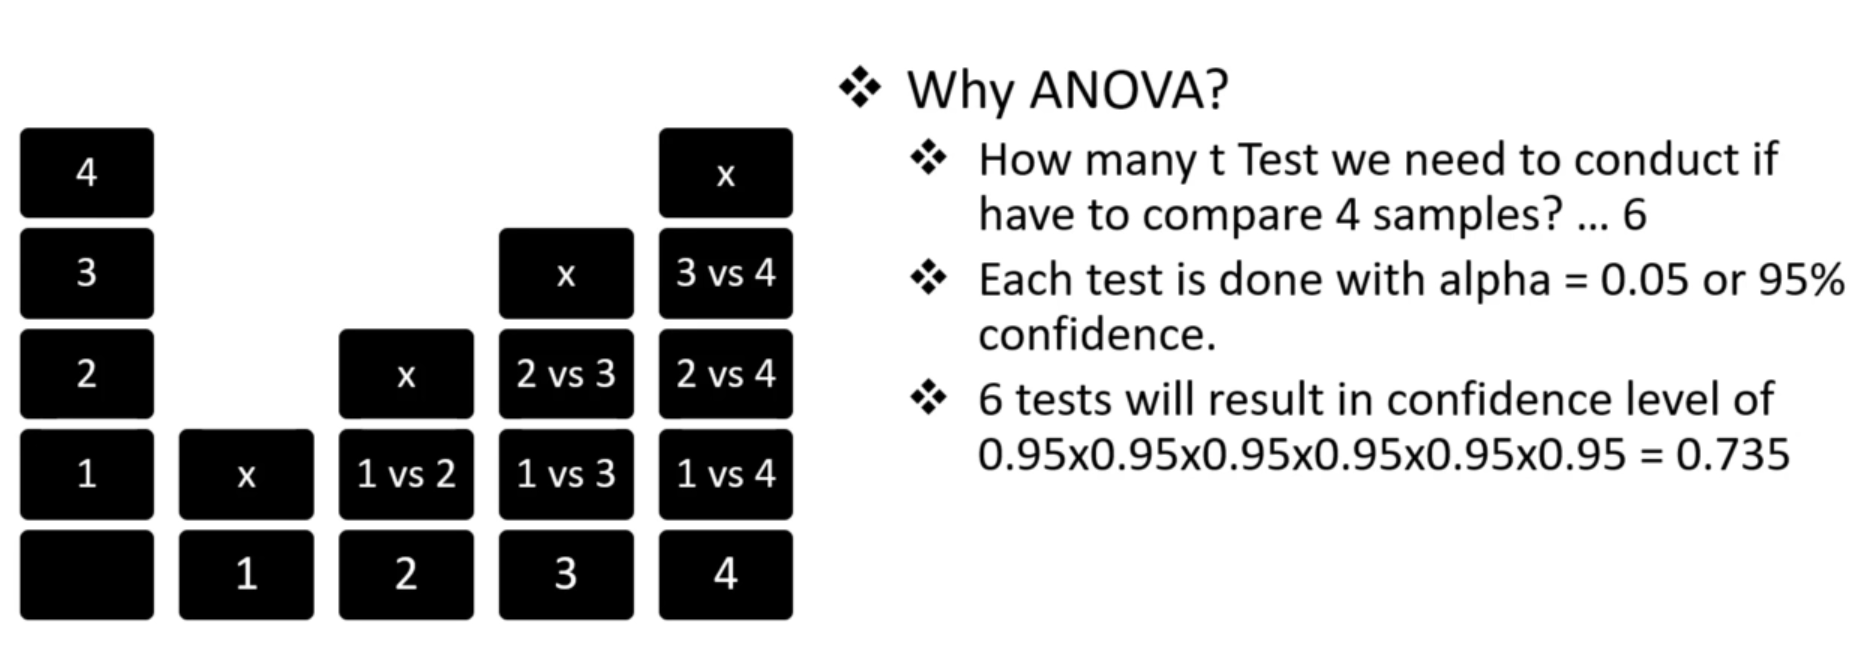

## ANOVA - Conceptual Understanding

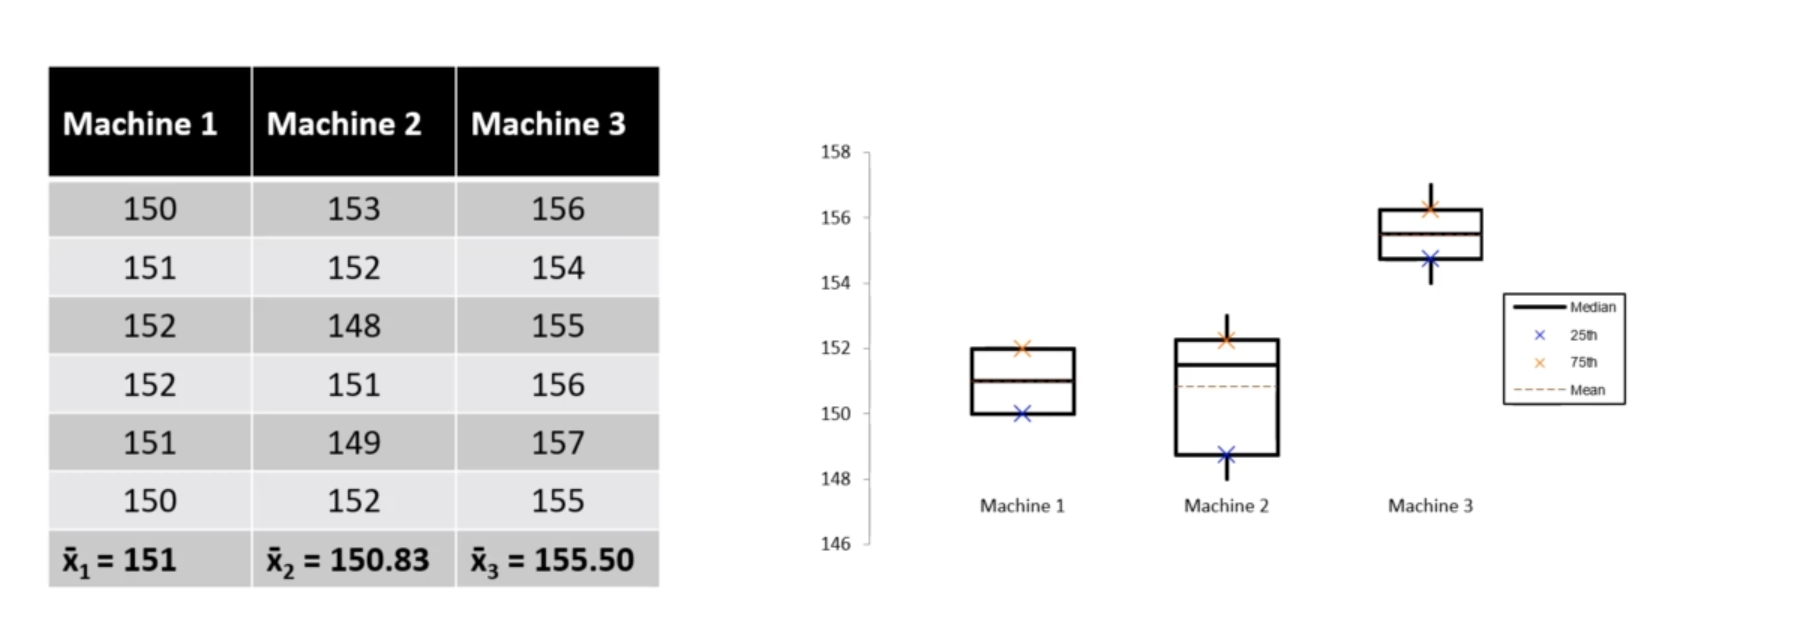

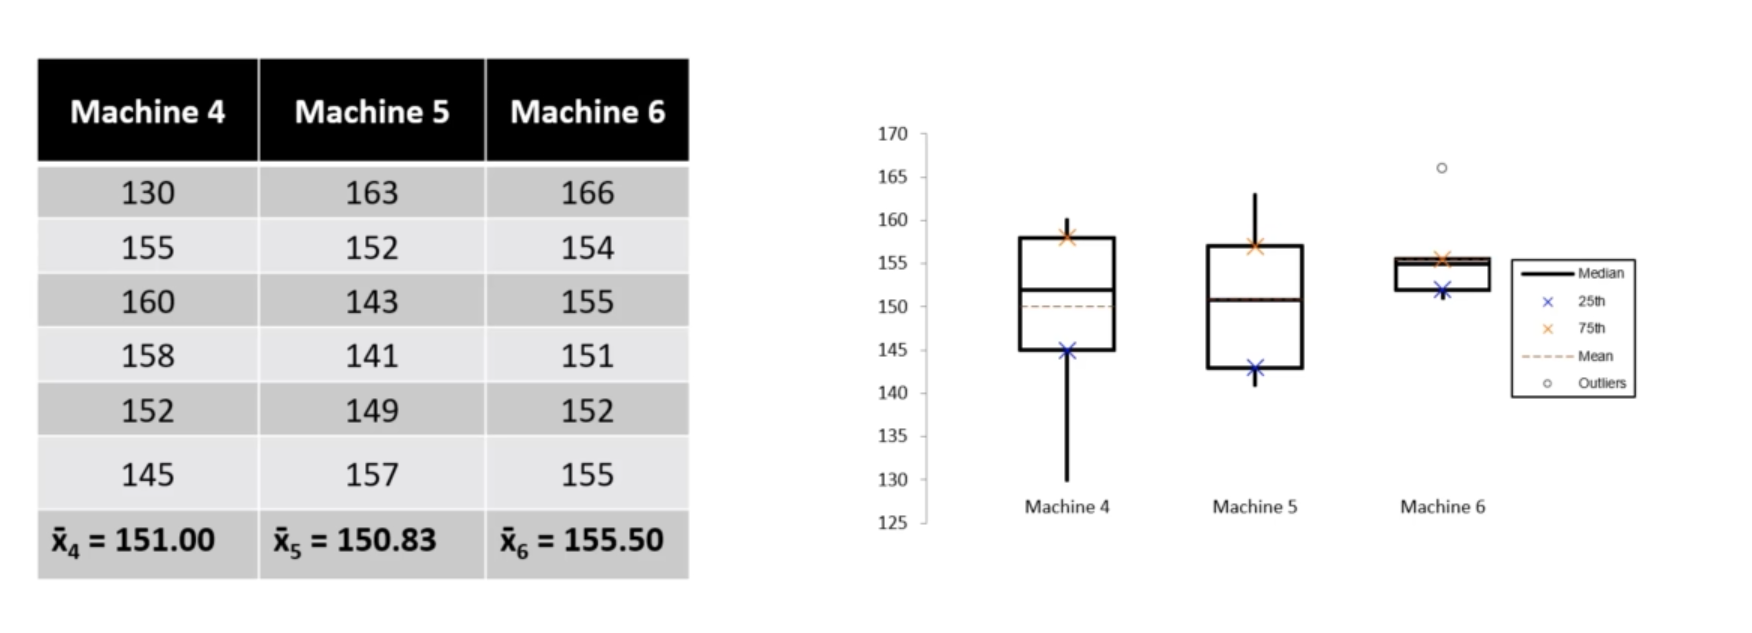

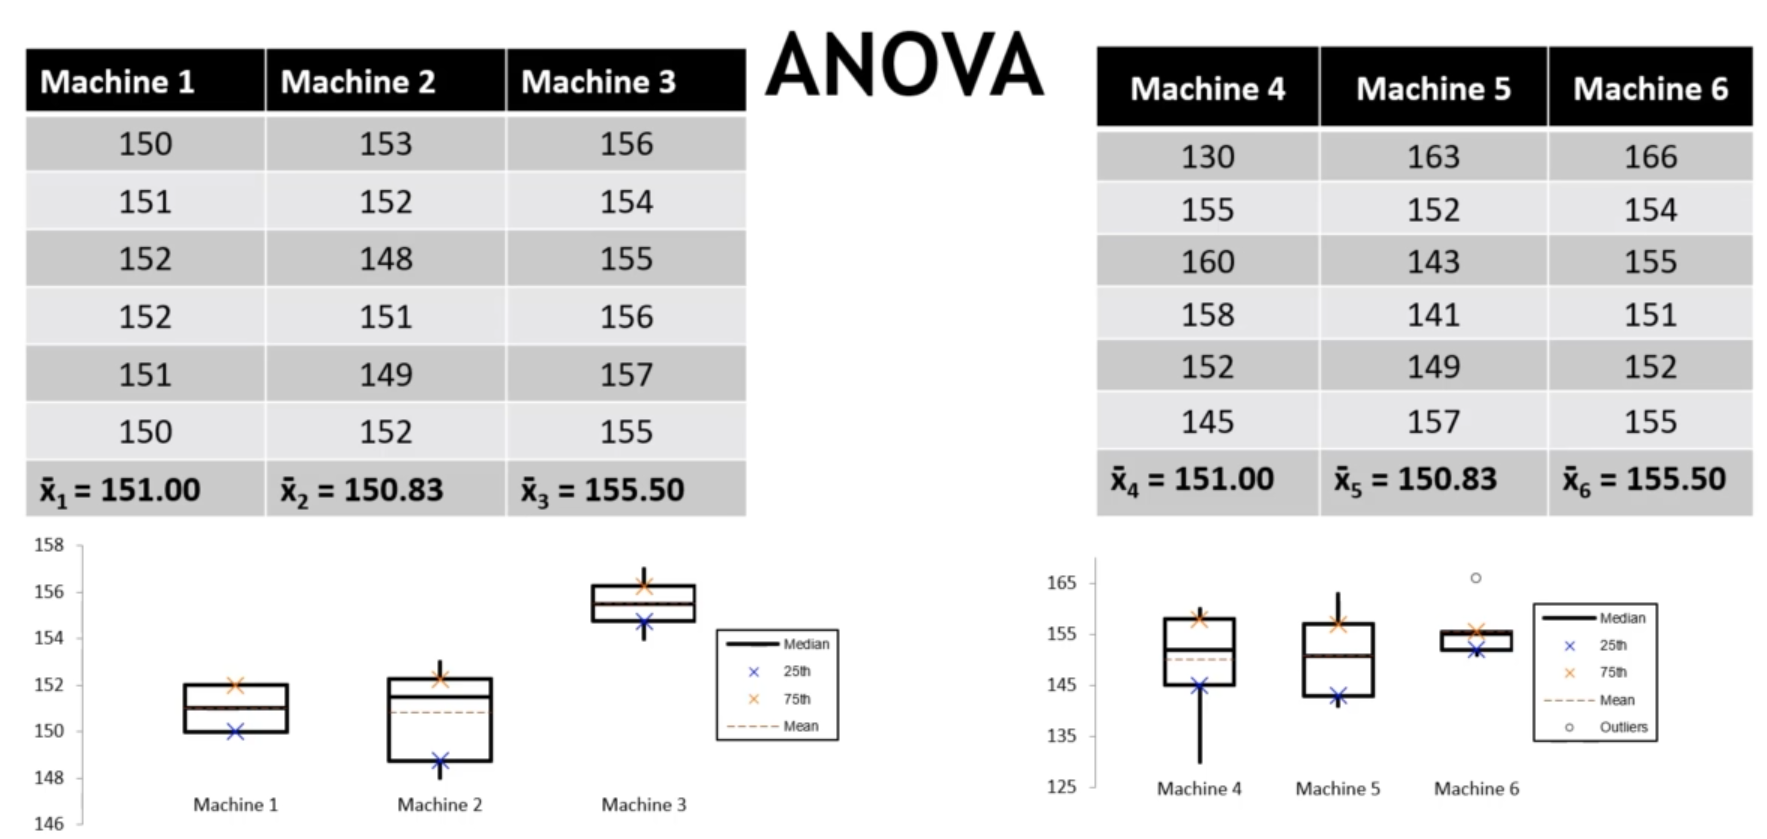

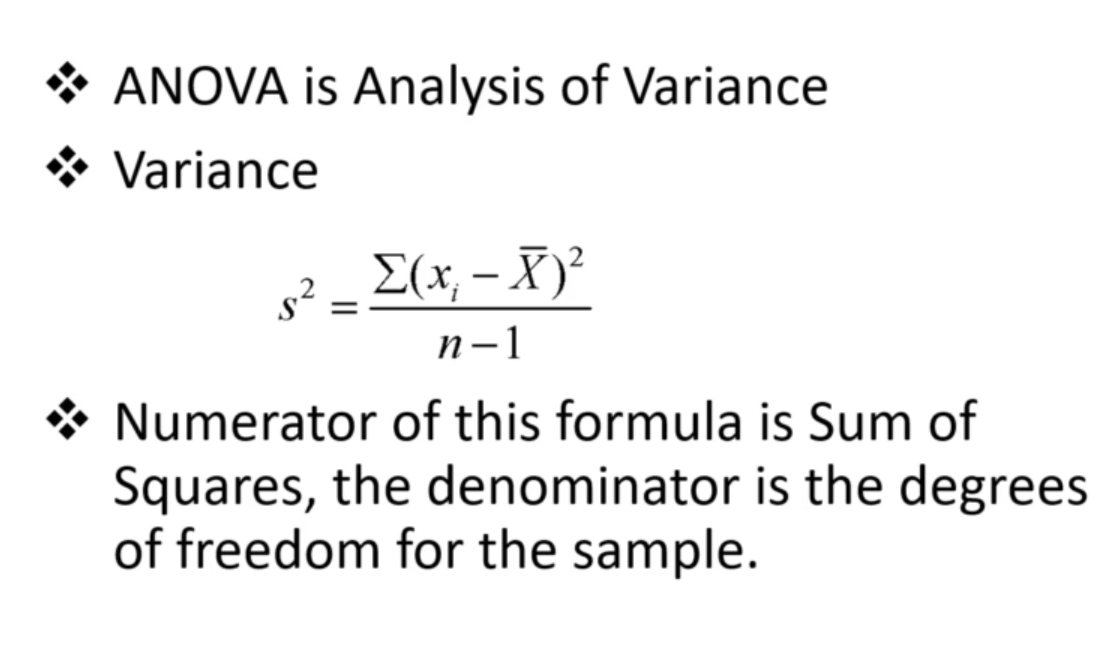

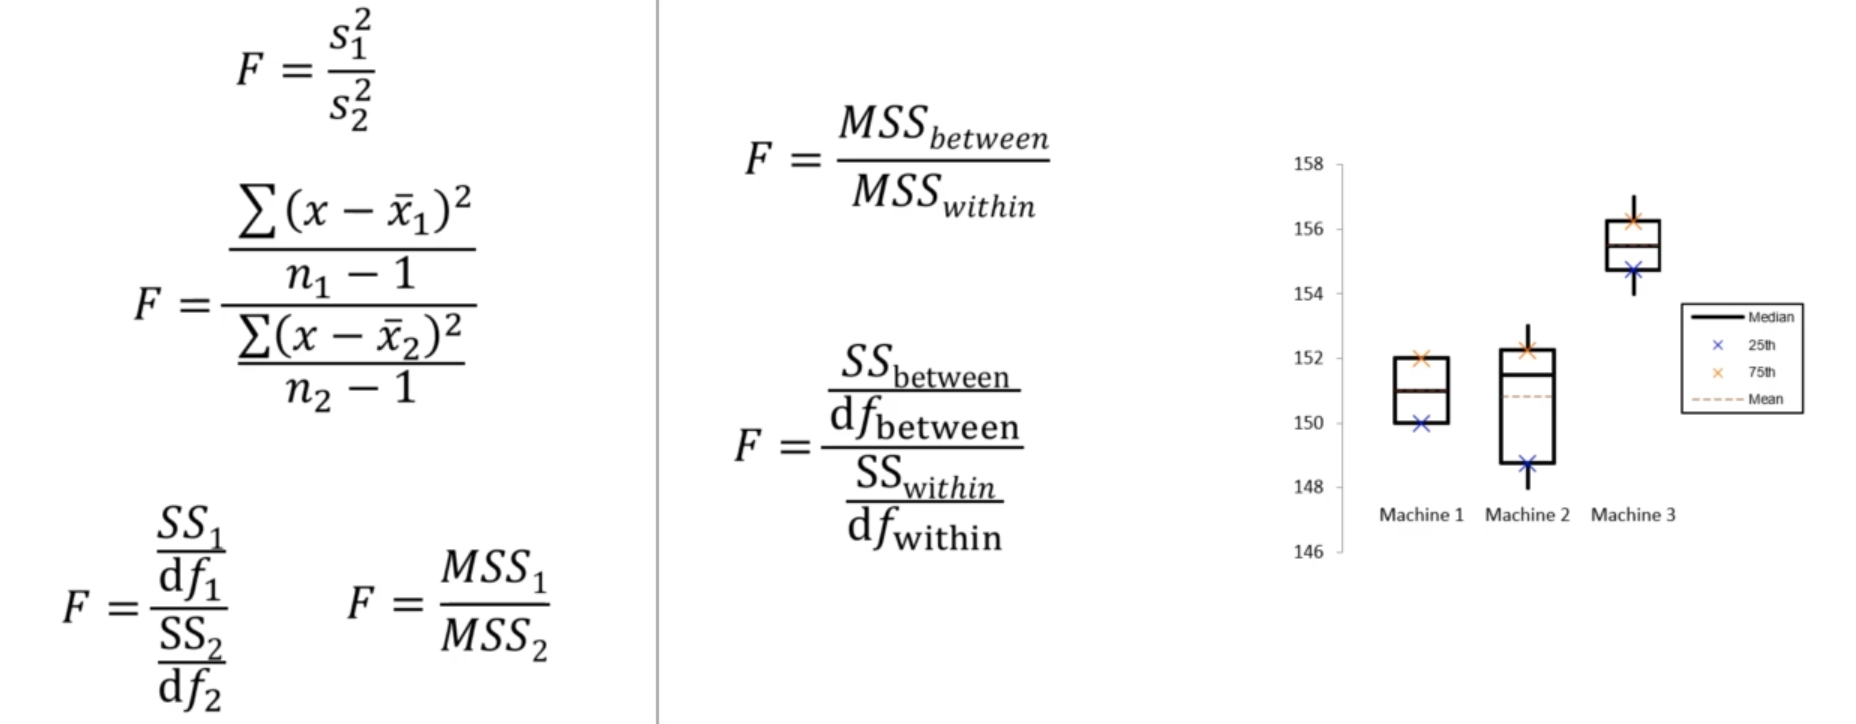

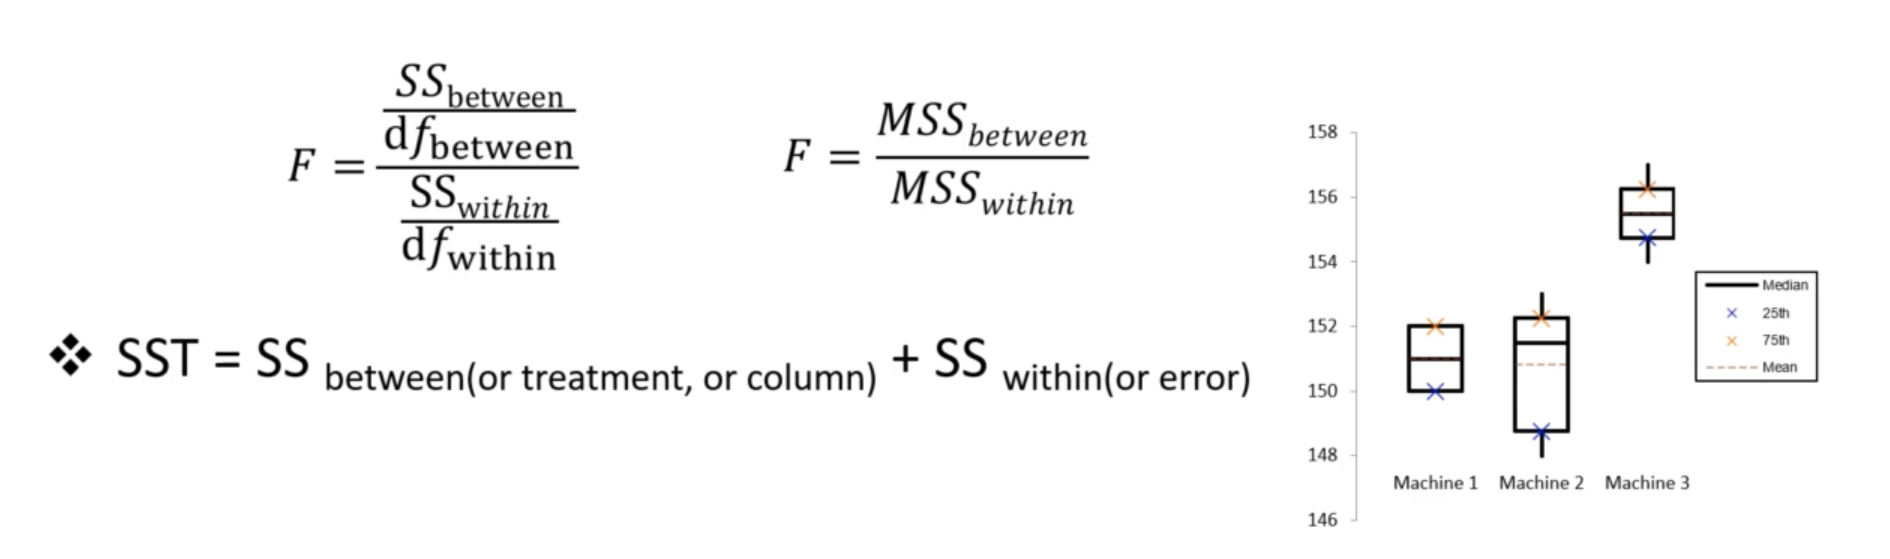

## ANOVA - Manual Calculation

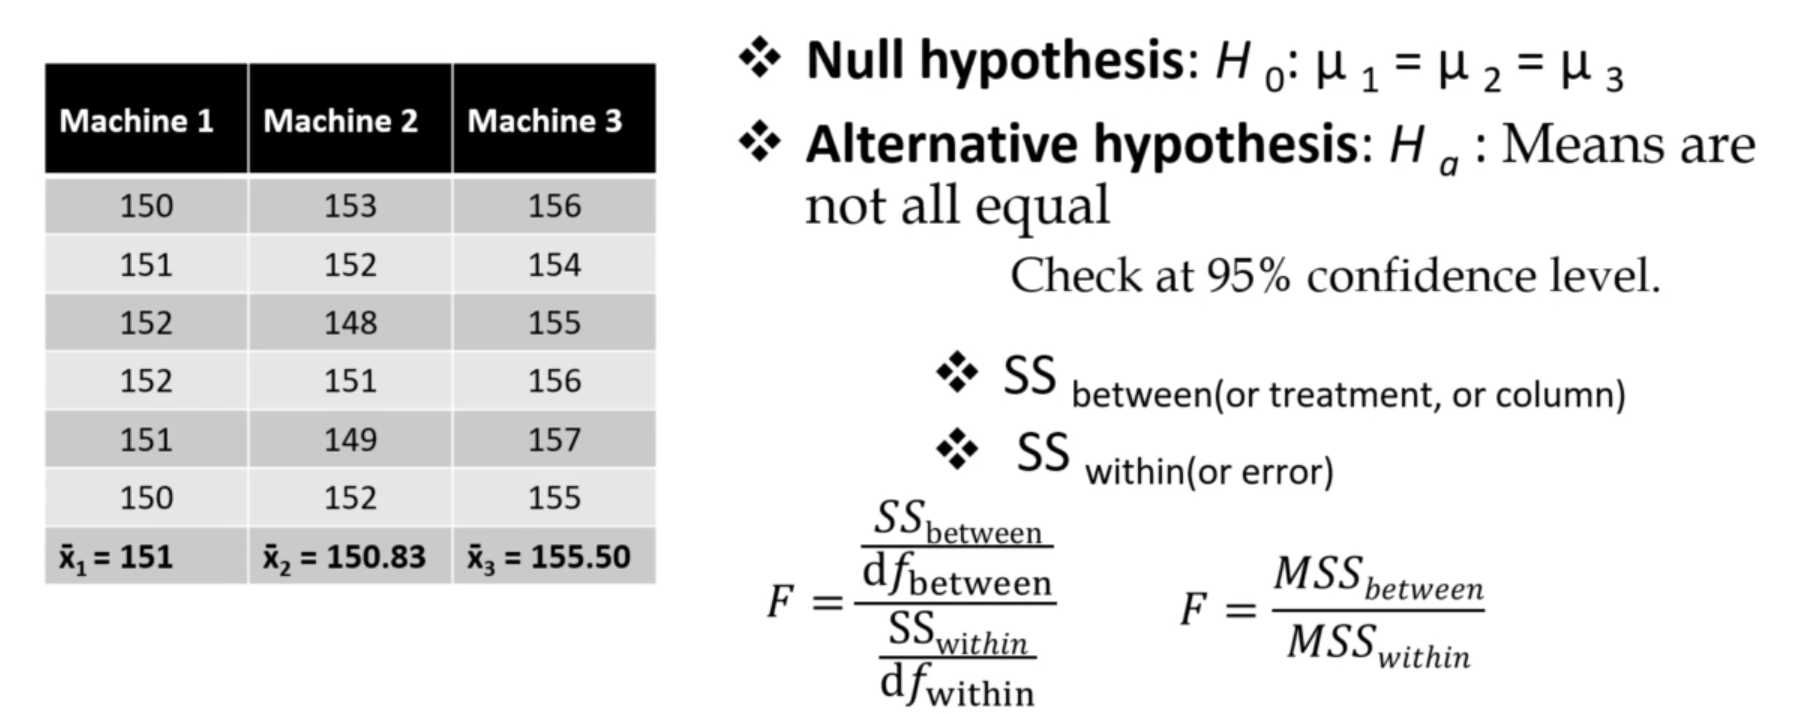

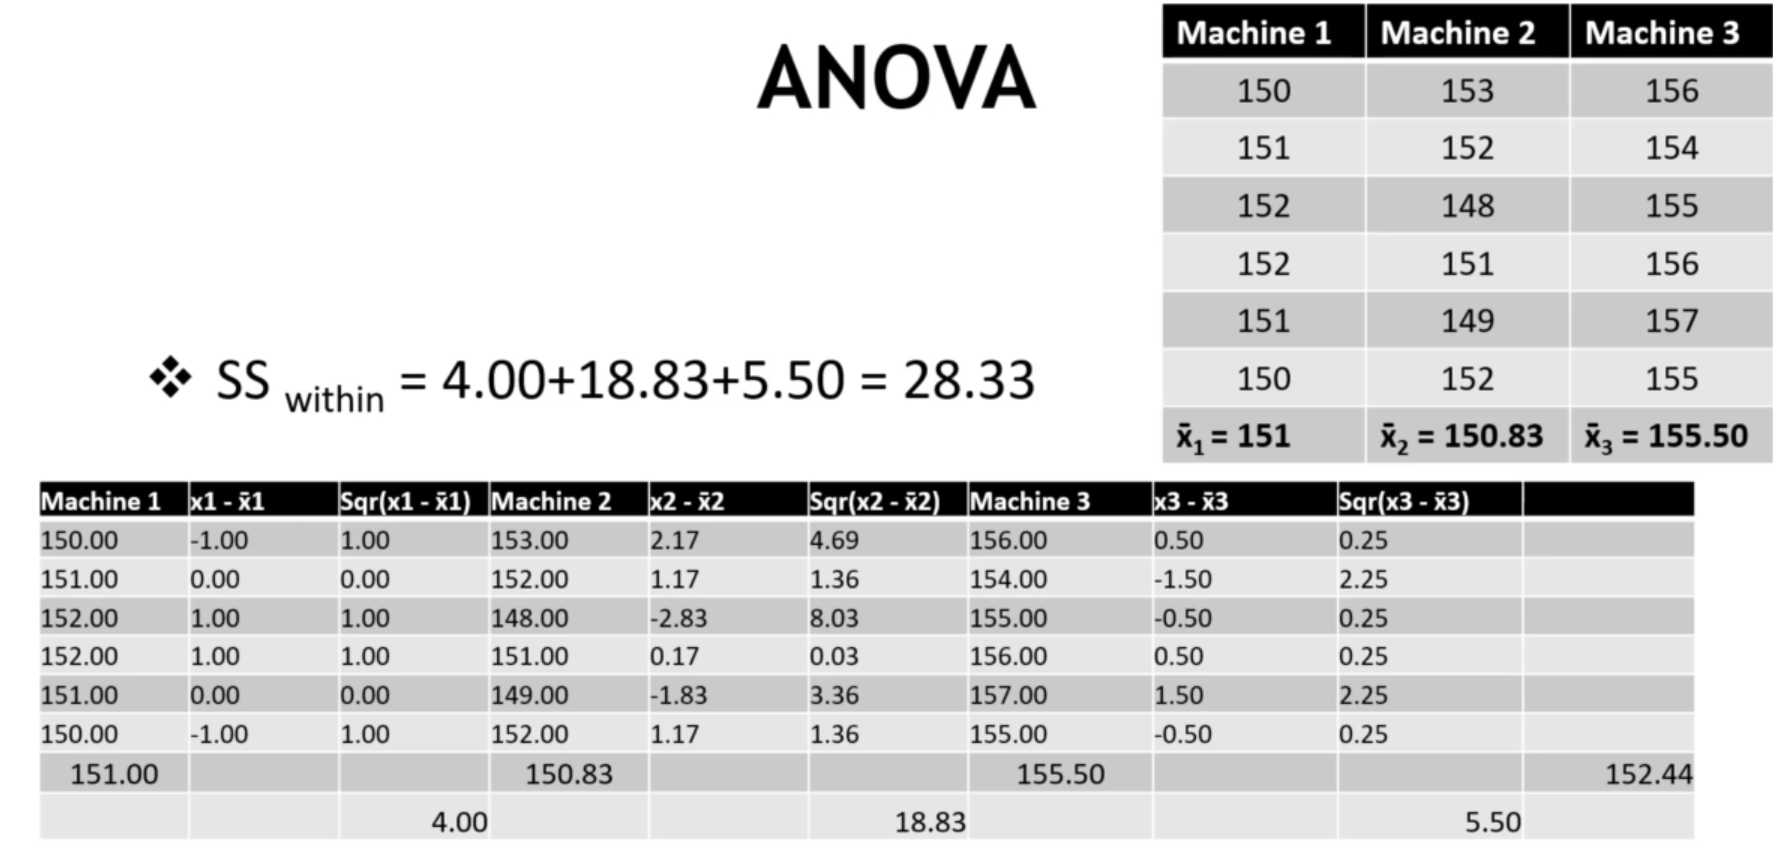

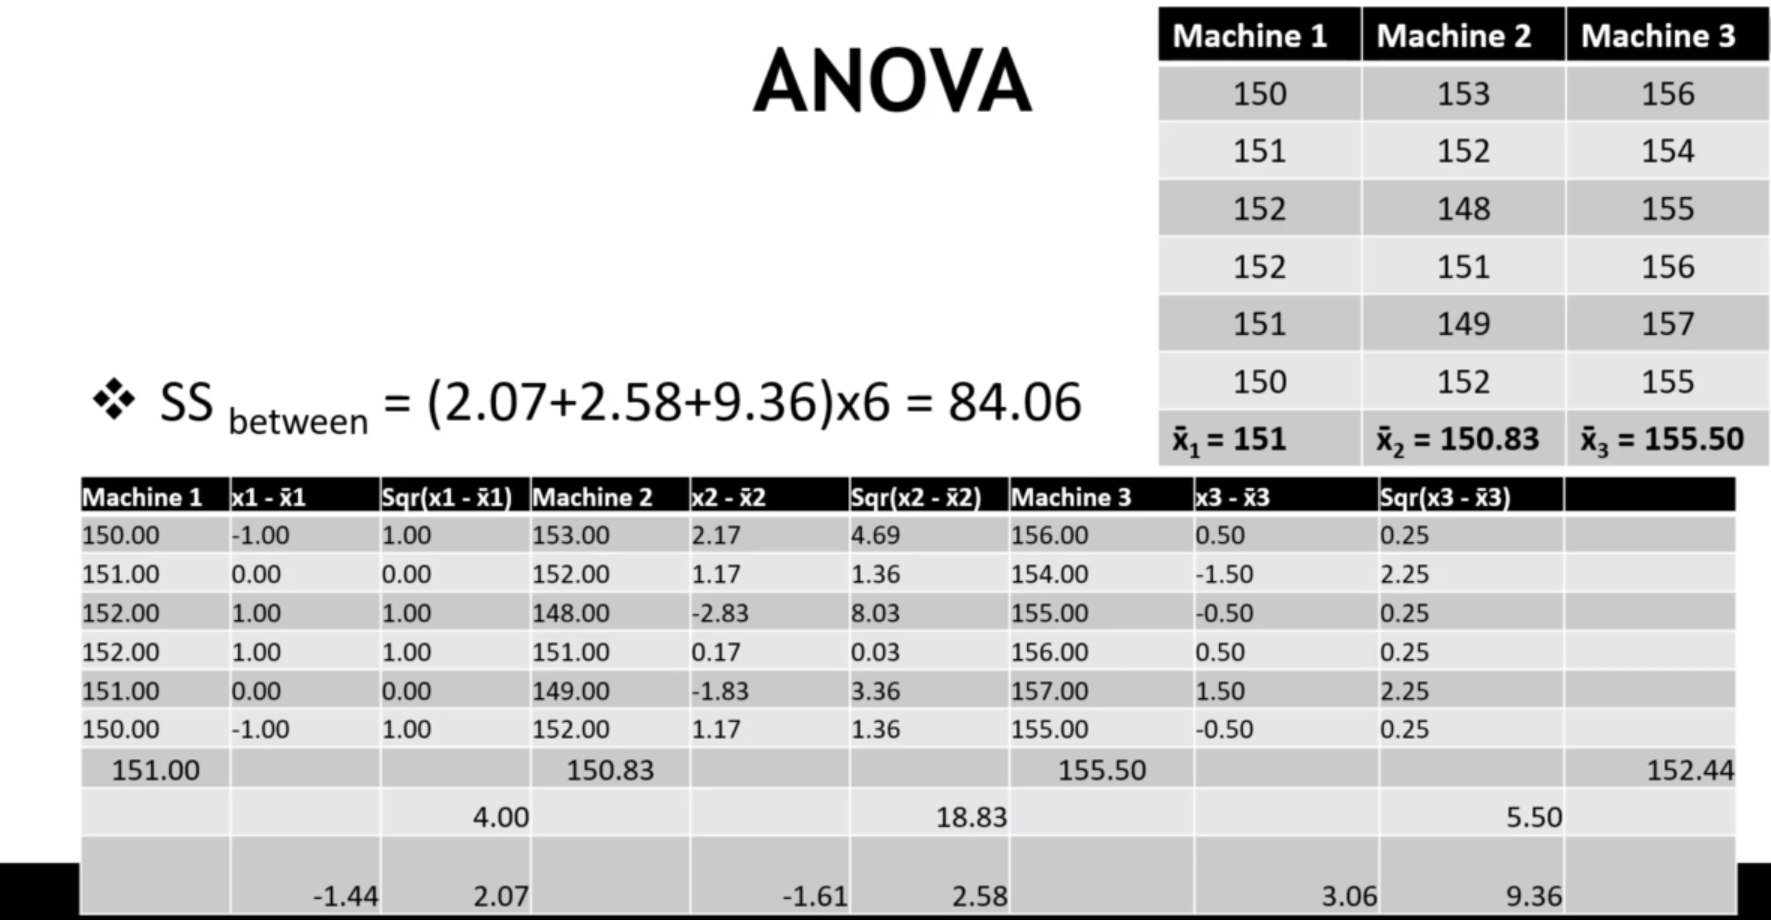

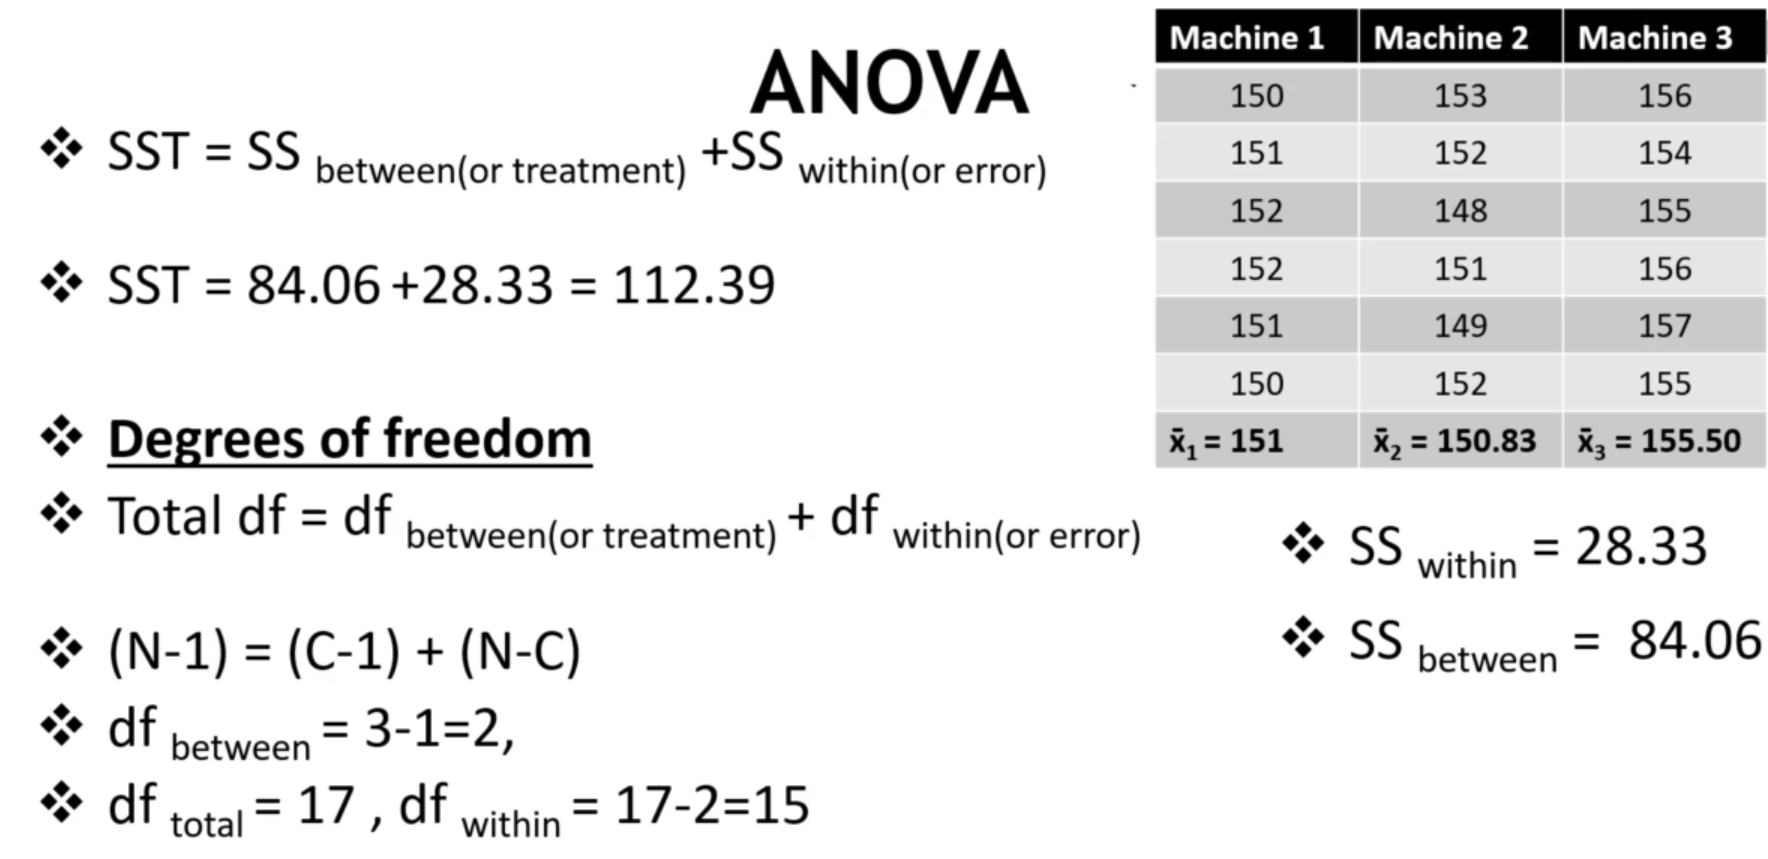

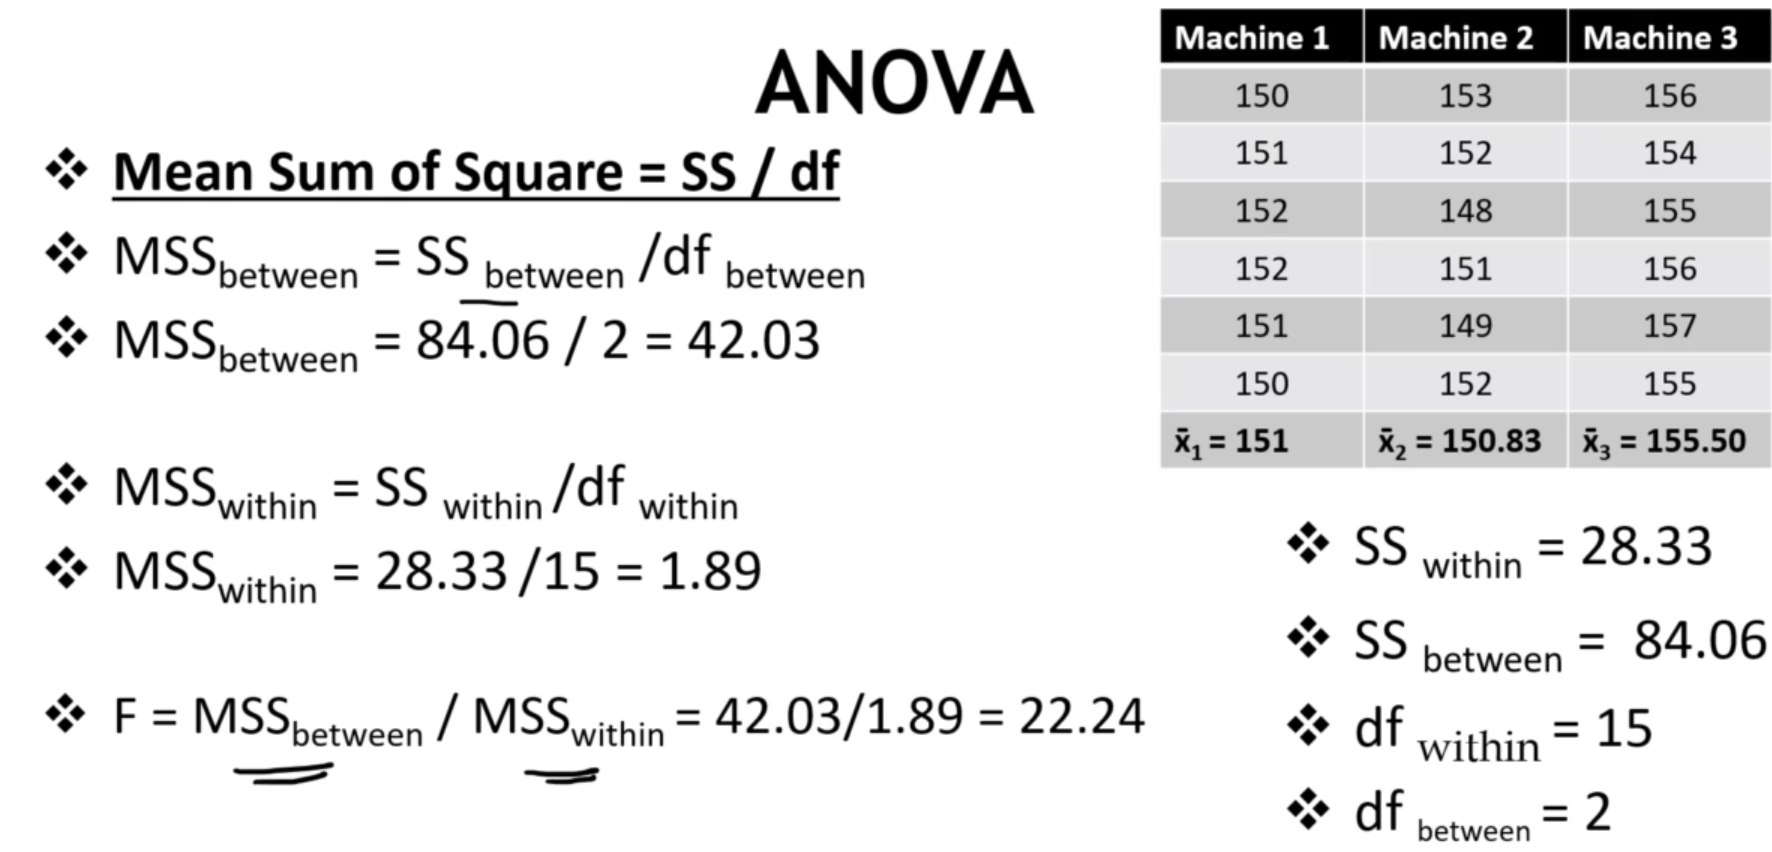

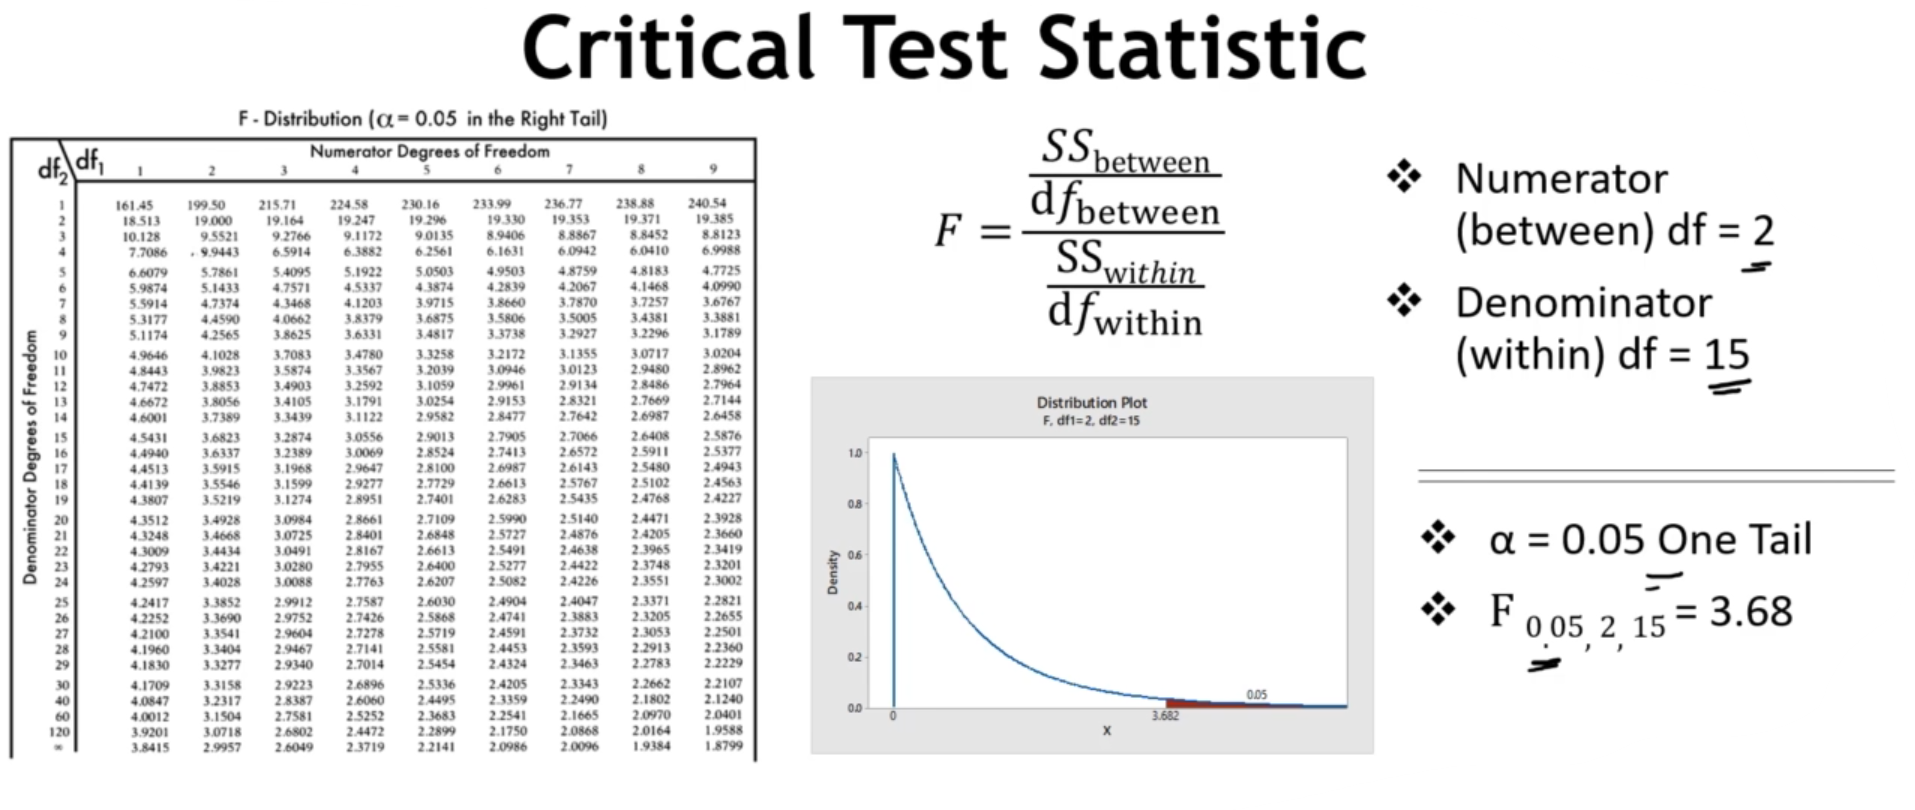

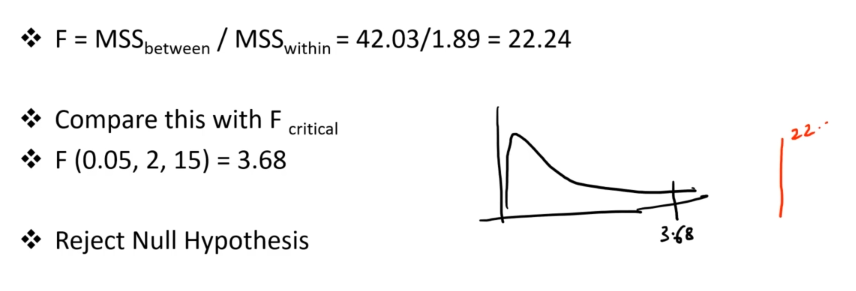

## ANOVA using Python

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.stats.oneway as oneway
import scipy.stats as stats

In [2]:
m1 = [150, 151, 152, 152, 151, 150]
m2 = [153, 152, 148, 151, 149, 152]
m3 = [156, 154, 155, 156, 157, 155]

In [4]:
stats.f_oneway(m1, m2, m3)

F_onewayResult(statistic=22.264705882352935, pvalue=3.2374085509077445e-05)

Conclusion: Reject the Null Hypothesis

In [7]:
oneway.anova_oneway((m1, m2, m3))

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 32.670604190080006
pvalue = 5.859368513204802e-05
df = (2.0, 9.400451496253474)
df_num = 2.0
df_denom = 9.400451496253474
nobs_t = 18.0
n_groups = 3
means = array([151.        , 150.83333333, 155.5       ])
nobs = array([6., 6., 6.])
vars_ = array([0.8       , 3.76666667, 1.1       ])
use_var = 'unequal'
welch_correction = True
tuple = (32.670604190080006, 5.859368513204802e-05)

In [8]:
oneway.anova_oneway((m1, m2, m3),use_var = 'equal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 22.264705882352892
pvalue = 3.237408550907782e-05
df = (2.0, 15.0)
df_num = 2.0
df_denom = 15.0
nobs_t = 18.0
n_groups = 3
means = array([151.        , 150.83333333, 155.5       ])
nobs = array([6., 6., 6.])
vars_ = array([0.8       , 3.76666667, 1.1       ])
use_var = 'equal'
welch_correction = True
tuple = (22.264705882352892, 3.237408550907782e-05)

## ANOVA using a Dataset in Python

In [12]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [15]:
mpg = sns.load_dataset(name='mpg')

In [19]:
mpg.sample(5)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
313  28.0          4         151.0        90.0    2678          16.5   
146  28.0          4          90.0        75.0    2125          14.5   
198  33.0          4          91.0        53.0    1795          17.4   
188  16.0          8         318.0       150.0    4190          13.0   
194  22.5          6         232.0        90.0    3085          17.6   

     model_year origin                    name  
313          80    usa      chevrolet citation  
146          74    usa              dodge colt  
198          76  japan             honda civic  
188          76    usa  dodge coronet brougham  
194          76    usa              amc hornet

In [21]:
mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [26]:
mpg.groupby('origin').mean()['mpg']

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [33]:
mpg[mpg['cylinders'] == 4].groupby("origin").mean()

mpg  cylinders  displacement  horsepower       weight  \
origin                                                                
europe  28.411111        4.0    104.222222   78.311475  2330.015873   
japan   31.595652        4.0     99.768116   75.579710  2153.492754   
usa     27.840278        4.0    124.284722   80.956522  2437.166667   

        acceleration  model_year  
origin                            
europe     16.722222   75.507937  
japan      16.569565   77.507246  
usa        16.526389   78.027778

In [34]:
mpg.groupby(['origin','cylinders']).mean()['mpg']

origin  cylinders
europe  4            28.411111
        5            27.366667
        6            20.100000
japan   3            20.550000
        4            31.595652
        6            23.883333
usa     4            27.840278
        6            19.663514
        8            14.963107
Name: mpg, dtype: float64

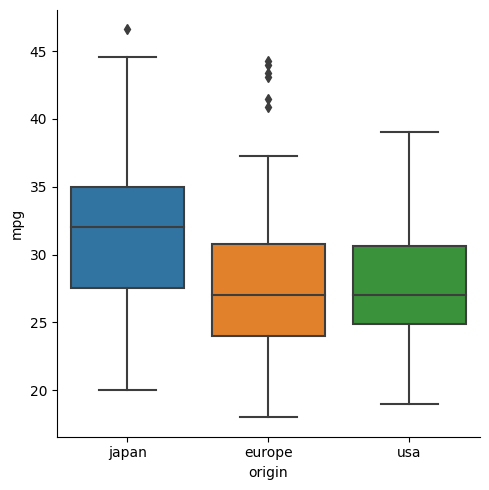

In [36]:
sns.catplot(data=mpg[mpg['cylinders'] == 4],x='origin',y='mpg',kind='box')

In [39]:
eu = mpg[(mpg['cylinders']==4) & (mpg['origin']=='europe')]['mpg']
jp = mpg[(mpg['cylinders']==4) & (mpg['origin']=='japan')]['mpg']
us = mpg[(mpg['cylinders']==4) & (mpg['origin']=='usa')]['mpg']

In [40]:
eu

19     26.0
20     25.0
21     24.0
22     25.0
23     26.0
       ... 
353    33.0
354    34.5
359    28.1
375    36.0
394    44.0
Name: mpg, Length: 63, dtype: float64

In [42]:
oneway.anova_oneway((eu, jp, us),use_var = 'equal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 9.411845545485592
pvalue = 0.00012379894210177455
df = (2.0, 201.0)
df_num = 2.0
df_denom = 201.0
nobs_t = 204.0
n_groups = 3
means = array([28.41111111, 31.59565217, 27.84027778])
nobs = array([63., 69., 72.])
vars_ = array([41.50584229, 29.54777494, 20.6984957 ])
use_var = 'equal'
welch_correction = True
tuple = (9.411845545485592, 0.00012379894210177455)

In [43]:
stats.f_oneway(eu,jp,us)

F_onewayResult(statistic=9.411845545485601, pvalue=0.00012379894210177303)

Conclusion: There is a significant difference in mpg for 4 cylinder engine in europe, japan, and usa origin.